## PREFACE : ABOVE ALL, GET JUPYTER NOTEBOOK

## Pipeline
sequence of processing steps
from start to finish.
### 계획 - 데이터 먼징 - 데이터 분석 - 머신러닝(예측, 회귀, 분류) 모든 과정을 한 환경에 공책처럼 기록 가능

* reproducible
* tweakable
* documented : 기획, 의도 모든 것 기록
* 갈아 엎으라 했을 때, 재사용 가능

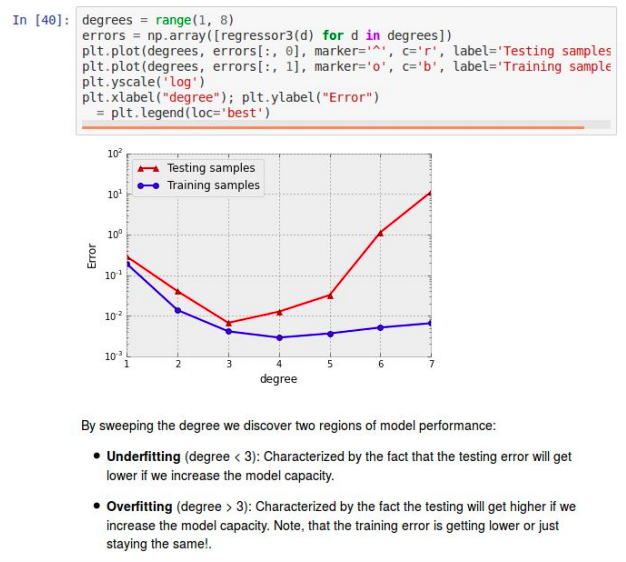

# < Data Munging >

## 1).     Get !!
## 2).     Process !! 


### => Analysis(Pandas), 머신러닝(필요한 것만 벡터, 행렬로) 하는 사람에게 바로 사용할 수 있게 떠먹여주기

#### <1>. ______________________GET !!

1. CRAWLING : 웹사이트에서 긁어오기 => 웹사이트의 ""!! HTML !!"" 을 받아오고 가공해서 사용
#### <1>. 특징 : HTML 에서 내가 원하는 것을 직접 찾아서 긁어오고, 내가 알아서 표로 만들어야함. 먼소리지?
#### <2>. 개념에 대해서 직접 확인 ( IMBD 크롤러 만든 과정 직접 설명 )
-----
2. DATASET DOWNLOAD : 누군가가 회사,캐글,정부 깔금하게 또는 더럽게라도 정리를 해놓은 경우 파일 하나로 다운, 데이터 세트 인증키로 요청해서 가공
#### 예시) 공공데이터 셋트 : 
#### <1>. 요청키를 주고 받아온 경우 : 저기 밑에 있음
#### <2>. 그냥 파일 다운로드한 경우 

## 3). DATASET : DOWNLOAD IT TO PROCESS or PROCESS IT TO SAVE AND USE AND GIVE
## : 밑의 네가지 통일된 양식을 쓰자고, 암묵적 합의를 한 상태 => 통일된 분석툴을 가지고 손쉽게 가공가능

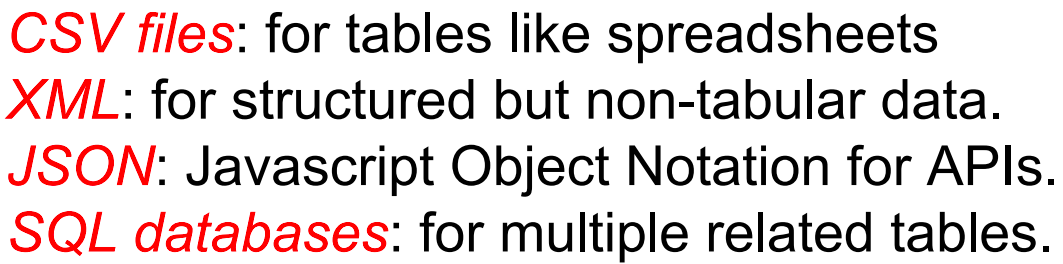

### 1.____CSV
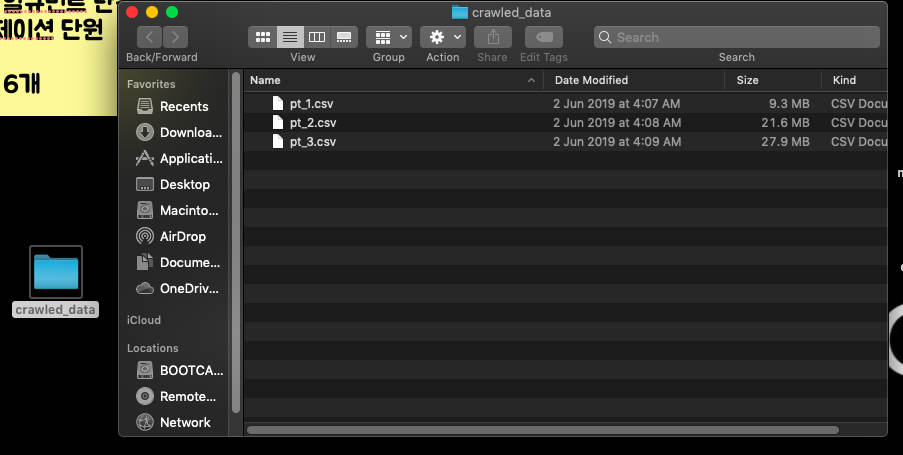

### 2.____XML : 구조 (0), 테이블형태(X)인 구조화된 문자열

http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcNrgTrade?LAWD_CD=11110&DEAL_YMD=201512&serviceKey=8d9EtnkSaopPytmVdO5Ka%2BNKSTSwMWe%2FGw3ilZLi4fcnLp97CRJLw5xqjLx%2FEzo%2BeQ6w1IQOY5lP4yisTJGj%2BA%3D%3D

In [7]:
# Import modules 
import urllib3
# Get html text and let lxml parse it in its own way.
http = urllib3.PoolManager()

In [8]:
# 기본 url
url = 'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcNrgTrade'

# LAWD_CD : 법정동 코드 / DEAL_YMD : 거래 년/월 / SERVICE KEY : 나한테 공공데이터가 준 키.
queryParams = '?' + 'LAWD_CD=' + '11110' + '&DEAL_YMD=' + '201512' + '&serviceKey=' + '8d9EtnkSaopPytmVdO5Ka%2BNKSTSwMWe%2FGw3ilZLi4fcnLp97CRJLw5xqjLx%2FEzo%2BeQ6w1IQOY5lP4yisTJGj%2BA%3D%3D'

# 기본 url + 조회하고자하는 데이터, 개인 키와 결합 => 원하는 정보를 권한을 가지고 검색
url = url + queryParams

# 결과 받기
r = http.request('GET', url) # l is one link from loop
source = r.data
str(source, encoding = 'UTF-8')

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>120,000</거래금액><건물면적>395</건물면적><건물주용도>제2종근린생활</건물주용도><건축년도>2001</건축년도><년>2015</년><대지면적>160.64</대지면적><법정동> 효자동</법정동><시군구>종로구</시군구><용도지역>제2종일반주거</용도지역><월>12</월><유형>일반</유형><일>31</일><지역코드>11110</지역코드></item><item><거래금액>483,000</거래금액><건물면적>937</건물면적><건물주용도>제2종근린생활</건물주용도><건축년도>1990</건축년도><년>2015</년><대지면적>503.5</대지면적><법정동> 체부동</법정동><시군구>종로구</시군구><용도지역>제2종일반주거</용도지역><월>12</월><유형>일반</유형><일>15</일><지역코드>11110</지역코드></item><item><거래금액>22,000</거래금액><건물면적>31</건물면적><건물주용도>판매</건물주용도><건축년도>2007</건축년도><년>2015</년><대지면적> </대지면적><법정동> 종로1가</법정동><시군구>종로구</시군구><용도지역>일반상업</용도지역><월>12</월><유형>집합</유형><일>10</일><지역코드>11110</지역코드><층>-1</층></item><item><거래금액>158,000</거래금액><건물면적>276</건물면적><건물주용도>숙박</건물주용도><건축년도>1959</건축년도><년>2015</년><대지면적>72.8</대지면적><법정동> 와룡동</법정동><시군구>종로구</시군구><용도지역>일반상업</용도지역><월>12</월><유형>일반</유형><일>8</일><지역코드>11110</지역코드></item>

In [9]:
import xml.etree.ElementTree as ET
root = ET.fromstring(str(source, encoding = 'UTF-8'))

In [10]:
element= ['거래금액', '건물면적', '법정동'] # 원하는 차원만 추려서 명단 작성
data = dict()
for k in element:
    a = [i.text for i in root.iter(k)]
    data[k] = a

In [11]:
# Import pands
import pandas as pd 

# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df

,거래금액,건물면적,법정동
0,"120,000",395,효자동
1,"483,000",937,체부동
2,"22,000",31,종로1가
3,"158,000",276,와룡동
4,"158,000",276,와룡동
5,"247,500",154,삼청동
6,"160,000",79,삼청동
7,"174,000",323,봉익동
8,"162,000",201,인의동
9,"14,700",9,예지동


### 3)._________JSON : Java Script Object Notation

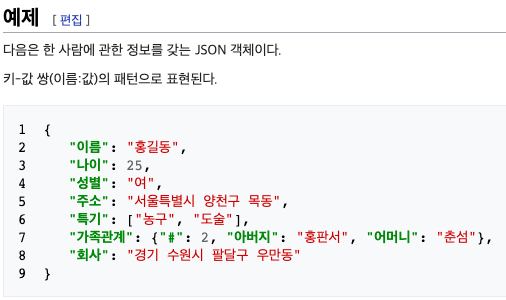

[결국 지향점은...]

1. 문자로 원상태를 긁어오기
2. 파이썬 분석기(parser : 구문분석기)
3. !! 판다스 테이블 !! 로 만들기

### 4. DATABASE______SQL

## 기업은 온라인으로 정보가 입력될때, 하나의 독립된 표에 정리한다. (relation)
## 그 표와 대화할 수 있는 문법(언어) SQL => 조회 / 업데이트 / 수정

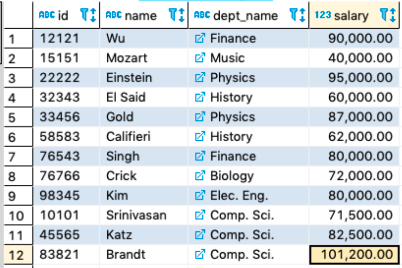

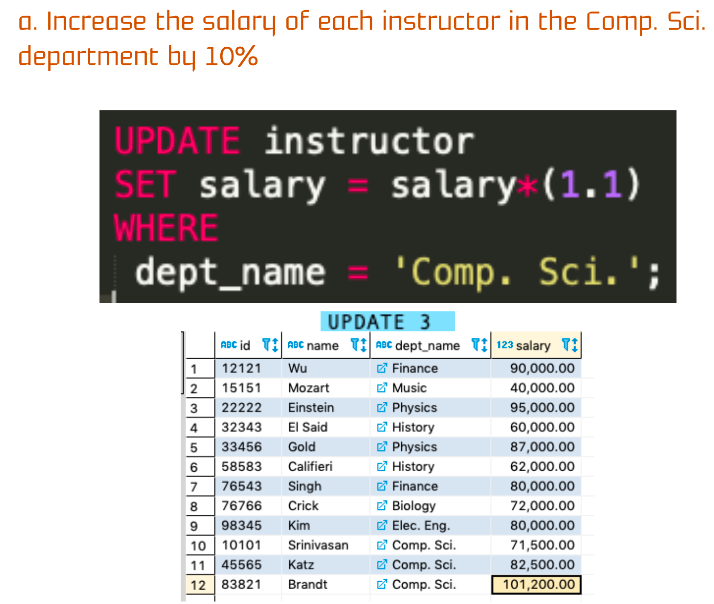